# Draft Machine Learning Model with Sample Datasets

## 1. Linear Regression
### Sales based on Critic score
Predict game's sale based on critic score
<br>Example: If critic score = 8, how likely will the sales be?

- model = LinearRegression()
- Target variable (y): Total_Sales
- Independent variable (X): Critic_Score

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df1 = pd.read_csv('Sample_Datasets/sample_critic_sales.csv')
df1.head(10)

,Critic_Score,Total_Sales
0,1.8,20.8
1,2.1,16.5
2,4.6,42.3
3,7.1,12.8
4,4.9,89.6
5,3.4,72.4
6,3.7,1.3
7,2.5,34.8
8,2.8,51.4
9,6.3,85.9


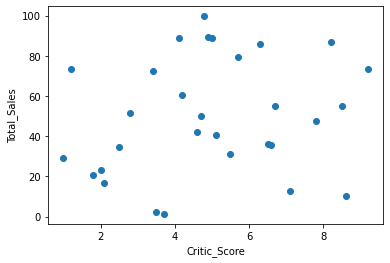

In [6]:
# Inspect the relationship of Critic_Score and Total_Sales
plt.scatter(df1.Critic_Score, df1.Total_Sales)
plt.xlabel('Critic_Score')
plt.ylabel('Total_Sales')
plt.show()

In [7]:
X = df1.Critic_Score.values.reshape(-1, 1)

In [16]:
# Inspect X
print(X[:5])
print("-------")
print(f'X.shape: {X.shape}')

[[1.8]
 [2.1]
 [4.6]
 [7.1]
 [4.9]]
-------
X.shape: (30, 1)


In [10]:
# Assign target variable
y = df1.Total_Sales

In [11]:
# Prediction
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(30,)


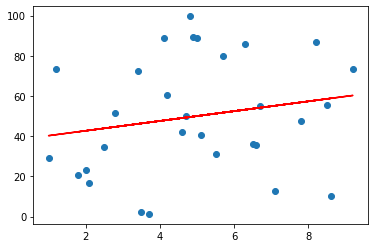

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
print(f'slope: {model.coef_}')
print(f'y-intercept: {model.intercept_}')

slope: [2.44340259]
y-intercept: 37.8044025664912


## 2. Random Forest Regression

### Predict Sales pattern based on various factors
- model = RandomForestRegressor()
- Target variable (y): 
    - Total_Sales
- Independent variables (X): 
    - Critic_Score (int)    
    - User_Score   (int)
    - Genre              
    - ESRB_Rating         
    - Platform
    - Year_released               
    - Country  

### Steps:
1. Define target variable and independent variables
2. Split the dataset into the Training set and Test set
3. Train the Random Forest Regression model
4. Predict the results

### Testing with sample randomly generated encoded data

In [2]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# Load sample data
encoded_df = pd.read_csv('Sample_Datasets/sample_encoded_data.csv')
encoded_df

,Critic_Score,User_Score,Genre,ESRB_Rating,Platform,Year_released,Country,Total_Sales
0,1.9,2.0,4,2,39,22,17,2.3
1,3.8,9.5,14,2,20,36,2,55.4
2,8.8,4.7,19,3,0,42,3,20.2
3,7.3,6.8,15,4,37,7,11,44.9
4,6.6,1.5,8,2,3,21,12,78.3
5,3.0,1.9,16,0,3,26,16,79.1
6,5.5,9.6,9,4,23,7,5,90.4
7,5.4,8.9,11,5,17,40,18,7.2
8,2.4,1.2,5,3,2,27,3,57.4
9,8.6,8.3,4,1,18,14,0,97.2


In [4]:
# Define independent variable set
X = encoded_df.copy()
X = X.drop('Total_Sales', axis=1)
X.head()

,Critic_Score,User_Score,Genre,ESRB_Rating,Platform,Year_released,Country
0,1.9,2.0,4,2,39,22,17
1,3.8,9.5,14,2,20,36,2
2,8.8,4.7,19,3,0,42,3
3,7.3,6.8,15,4,37,7,11
4,6.6,1.5,8,2,3,21,12


In [6]:
# Define target variable set
y = encoded_df['Total_Sales'].values
y[:5]

array([ 2.3, 55.4, 20.2, 44.9, 78.3])

In [7]:
# Split dataset into Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Create and fir the model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [9]:
# Predict the result
y_pred = regressor.predict(X_test)
y_pred

array([62.93, 59.2 , 82.16, 90.51, 64.49, 59.01, 30.91, 65.25])

In [10]:
# Test accuracy
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.6626247245492944